This notebook is aiming at kicking off training job for comprehend custom classifier.

We have two ways to kick off the training job: using boto3 comprehend API or using pipeline

Prerequisite:

1) All data prepared in the prior notebooks

2) Valid AWS account with permission to call comprehend

Output:

1) A trained comprehend custom classifier model

##### Boto3 Comprehend API

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import boto3

In [ ]:
# Specify region and client
REGION = 'us-east-1'
s3 = boto3.resource('s3')
comprehend = boto3.client('comprehend', region_name = REGION)

In [ ]:
# upload training file to S3
s3.Bucket('scio-saas-datastores').upload_file('training_data_multi_label_batch123.csv', 'SaaS_workspace/aws_comprehend/inputs/training_data_multi_label_batch123_testpipeline.csv')

In [ ]:
# Specify training parameters
name = 'exl-custom-classifier-yy-multi-label-batch123'
language_code = 'en'
training_bucket = 'scio-saas-datastores'
training_key = 'SaaS_workspace/aws_comprehend/inputs/training_data_multi_label_batch123.csv'
data_access_role_arn = 'arn:aws:iam::097079433570:role/service-role/AmazonComprehendServiceRole-aws_scio_S3Datastore_servicewrite'

In [ ]:
# Kick off training job
response = comprehend.create_document_classifier(
        DocumentClassifierName = name,
        LanguageCode = language_code,
        InputDataConfig = {
            "DataFormat": "COMPREHEND_CSV",
            "S3Uri":f"s3://{training_bucket}/{training_key}"
        },

        OutputDataConfig = {
            "S3Uri":"s3://scio-saas-datastores/SaaS_workspace/aws_comprehend/output/multi_label_batch123",
            "KmsKeyId": "arn:aws:kms:us-east-1:097079433570:key/1c6d057c-0be3-40a6-b23c-5870a92b901f"
        },

        DataAccessRoleArn = data_access_role_arn,
        VolumeKmsKeyId = "arn:aws:kms:us-east-1:097079433570:key/1c6d057c-0be3-40a6-b23c-5870a92b901f",
        Mode = "MULTI_LABEL",

)

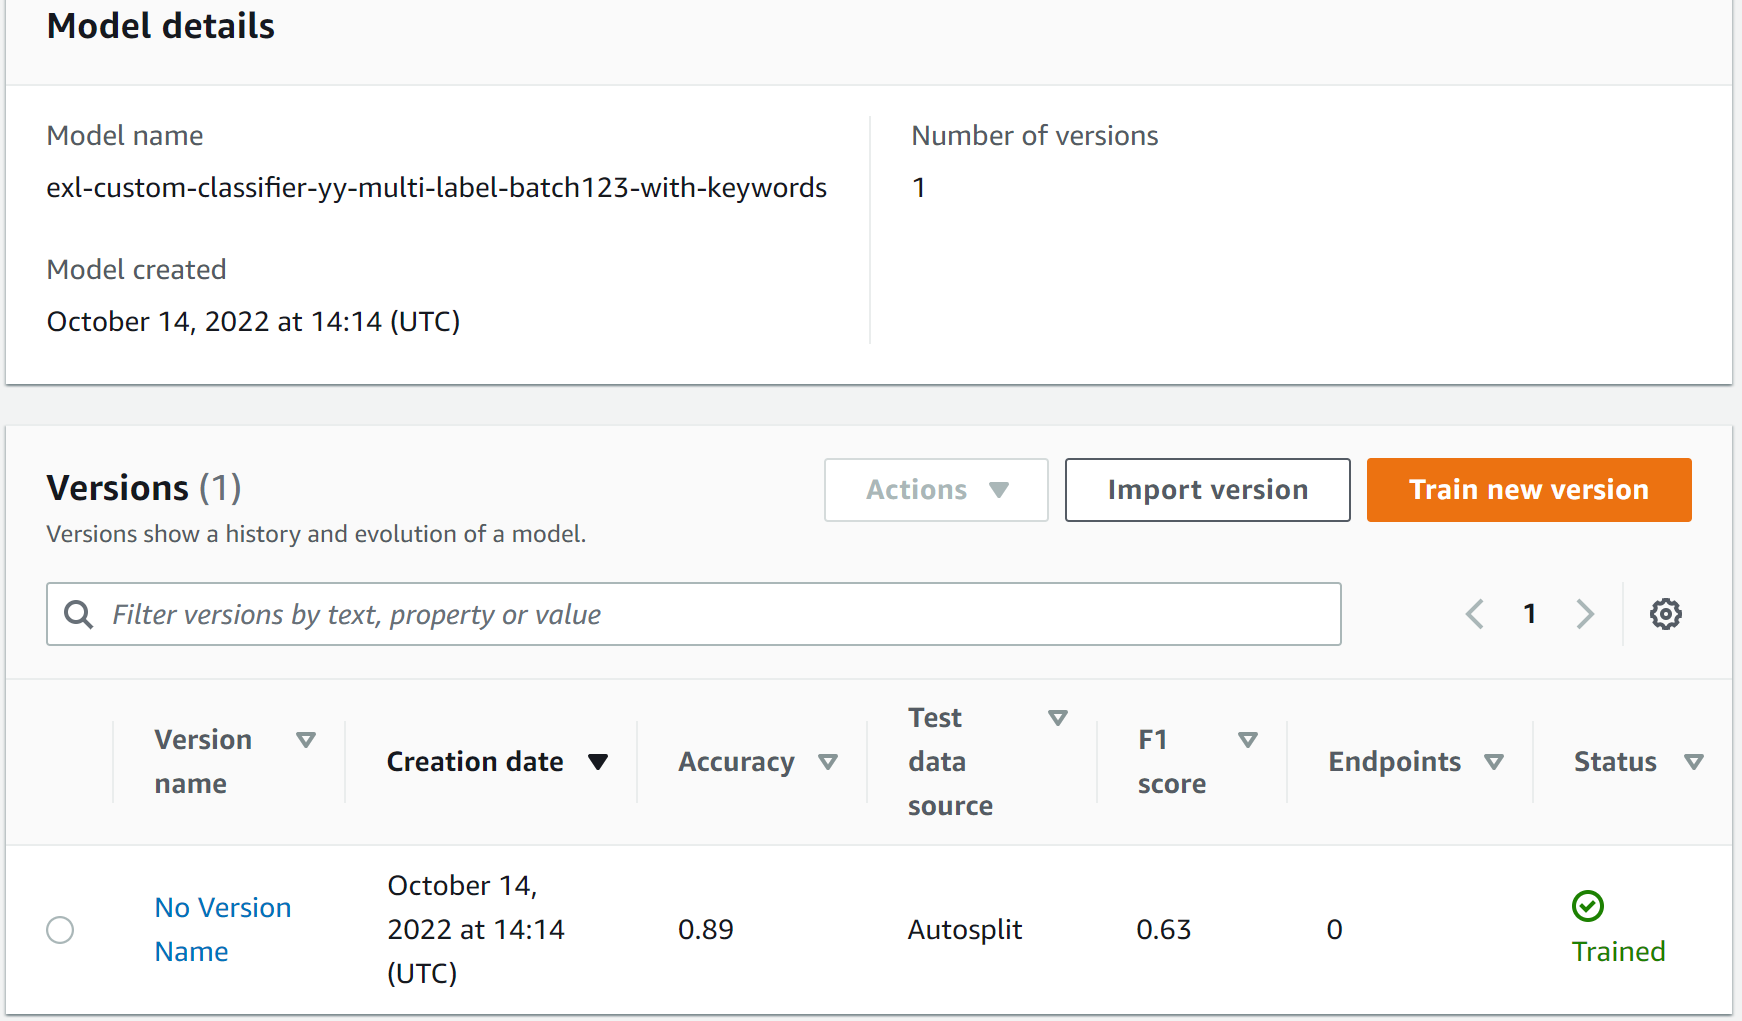

After training completes, Comprehend will output confusion_matrix.json file generated based on validation dataset. Example of confusion_matrix.json

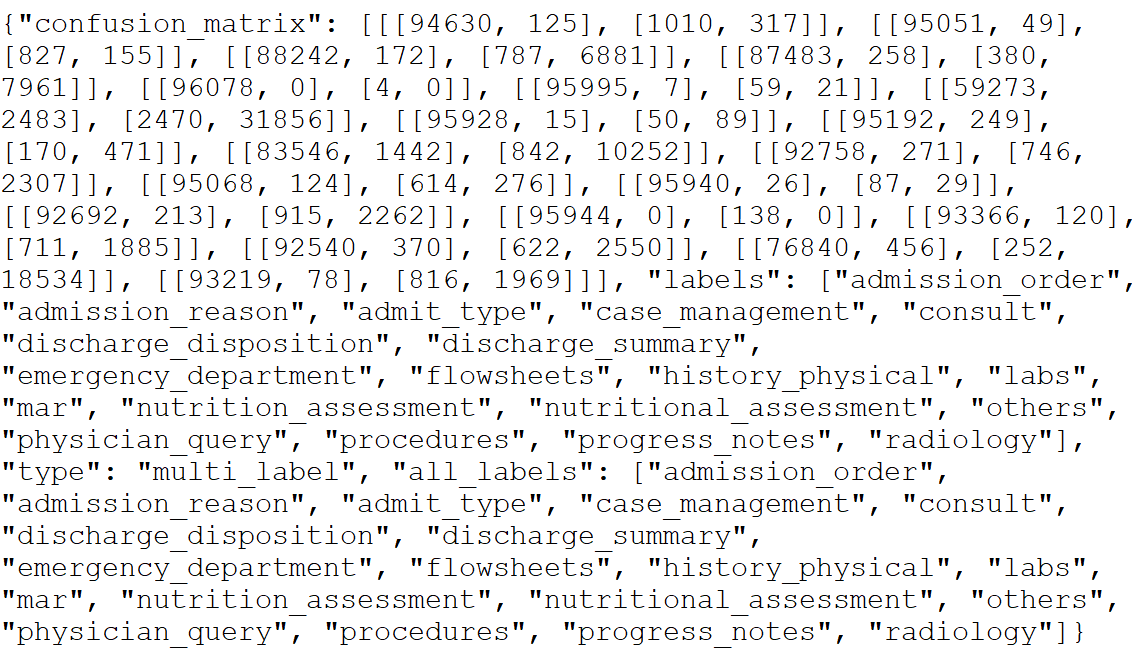

##### Training Pipeline

Training pipeline is moniorting the s3 bucket "s3://scio-saas-datastores/SaaS_workspace/aws_comprehend/inputs/"

When a file is uploaded to this location, training pipeline will kickoff step function and the step function will call Comprehend custom classifier for training

In [ ]:
# upload training file to S3
s3.Bucket('scio-saas-datastores').upload_file('training_data_multi_label_batch123.csv', 'SaaS_workspace/aws_comprehend/inputs/training_data_multi_label_batch123_testpipeline.csv')

The status of training job can be monitored by stepfunction ComprehendCustomClassifierSM

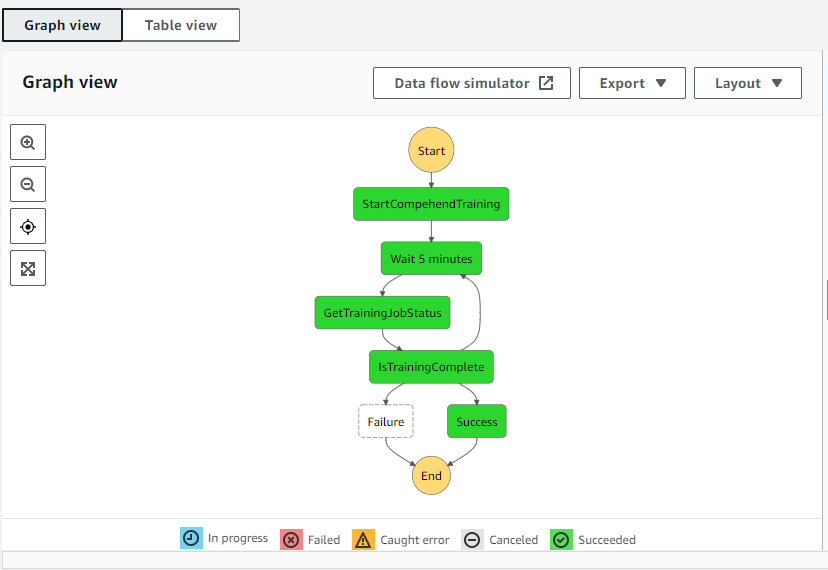

After the model was trained, it's model details can be checked on Comprehend console

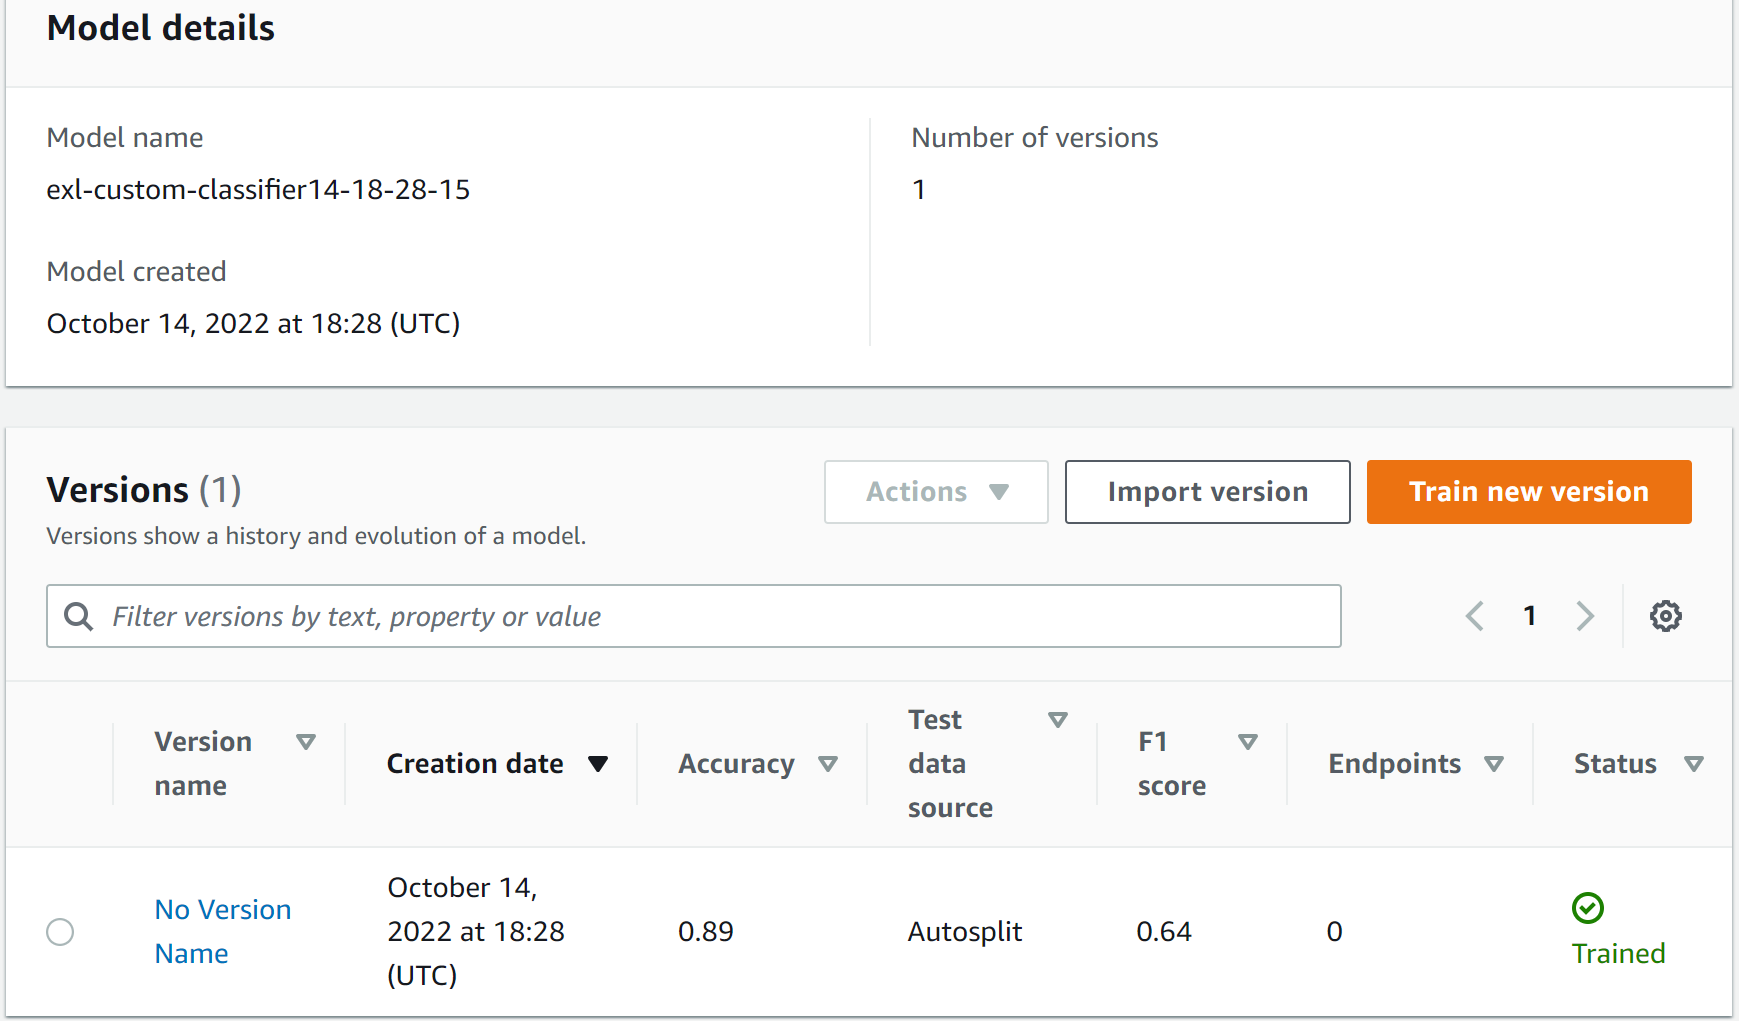